In [1]:
import torch
import torchvision
import matplotlib as plt

In [2]:
model = torch.load('./fasterrcnn_restnet50_fpn.path')

In [3]:
model.to(('cuda'))

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [4]:
from PIL import Image
from torchvision.transforms import transforms as T
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [7]:
img_pil = Image.open('../images/2024-03-12_15:31:18.720.jpg').convert("RGB")
transform = T.Compose([T.ToTensor()])
img = transform(img_pil)
img = img.to(('cuda'))
batch_img = [img]

In [8]:
np_img = np.array(img_pil)

In [9]:
np_img = np.expand_dims(np_img, axis = 0)

In [10]:
np_img.shape

(1, 480, 640, 3)

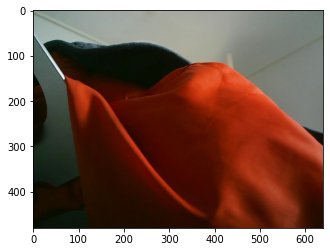

In [12]:
plt.imshow(np_img[0])

In [18]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [22]:
model(batch_img)

/home/jetson/.local/lib/python3.6/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /media/nvidia/NVME/pytorch/pytorch-v1.10.0/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[{'boxes': tensor([[ 14.1825,  86.6104, 640.0000, 479.1364],
          [ 51.1961,  93.5606, 441.1143, 472.7565],
          [ 21.3842,  65.6656, 410.8470, 462.1627],
          [ 22.8229,  68.4511, 496.7987, 463.3526],
          [  0.0000,  69.3562, 300.0516, 474.8942],
          [292.2244, 195.7013, 640.0000, 474.7178],
          [ 82.1406, 101.9643, 627.7225, 480.0000],
          [ 86.8915, 101.4337, 609.6779, 480.0000],
          [  2.5813, 185.2044, 111.0181, 424.6530],
          [  2.1775,  72.2735, 600.6846, 454.2199]], device='cuda:0',
         grad_fn=<StackBackward0>),
  'labels': tensor([ 1, 32, 49, 87,  1,  1, 51, 47, 67, 62], device='cuda:0'),
  'scores': tensor([0.8139, 0.2041, 0.1629, 0.1550, 0.1036, 0.0735, 0.0672, 0.0604, 0.0541,
          0.0534], device='cuda:0', grad_fn=<IndexBackward0>)}]